In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
plt.rc("figure", figsize=(10, 6))
plt.rc("font", size=14)

from sklearn.model_selection import train_test_split
from prep_plays import explore_plays_data, prep_plays_data
from wrangle_plays_data import train_validate_test, min_max_scale

In [6]:
from prep_plays import get_weeksnplays_data

# Import Data

In [8]:
 df = pd.read_csv('final.csv', index_col = [0])

In [9]:
train_validate, test = train_test_split(df, test_size=.3, random_state=123, stratify = df.pass_stopped)

    # split train_validate off into train (60% of 70% = 42%) and validate (40% of 70% = 28%)
train, validate = train_test_split(train_validate, test_size=.4, random_state=123, stratify = train_validate.pass_stopped)

In [10]:
train.T

,1945,11035,3867,10518,8749,10814,15058,3701,12302,1385,...,3794,14038,5249,15872,10672,7509,3671,5235,12280,10422
playDescription,(1:55) (Shotgun) E.Manning pass short left to ...,(2:00) (Shotgun) C.Newton pass short right to ...,(1:55) D.Carr pass short left to A.Cooper to O...,(2:50) (Shotgun) P.Rivers pass incomplete shor...,(13:37) (Shotgun) C.Keenum pass incomplete sho...,(6:36) (Shotgun) C.Daniel pass short right to ...,(7:51) (Shotgun) T.Brady pass short middle int...,(10:22) (Shotgun) C.Wentz pass short right to ...,(10:23) (Shotgun) D.Watson pass short right to...,(1:06) (Shotgun) B.Roethlisberger pass short l...,...,(13:43) (Shotgun) R.Tannehill pass short left ...,(2:44) J.Allen pass incomplete short right. Th...,(12:00) D.Watson pass short right to W.Fuller ...,(12:23) (Shotgun) B.Bortles pass incomplete sh...,"(14:00) (No Huddle, Shotgun) J.Goff pass short...",(:47) (Shotgun) B.Mayfield pass incomplete dee...,(:38) (Shotgun) M.Mariota pass short right to ...,(10:21) (Shotgun) D.Watson pass short left to ...,"(:30) (No Huddle, Shotgun) A.Rodgers pass inco...",(3:56) (Shotgun) D.Watson pass incomplete shor...
quarter,2,2,1,2,3,3,2,3,2,2,...,4,2,4,1,1,4,1,3,4,4
down,2,2,2,1,3,1,2,3,2,1,...,1,2,1,3,2,1,3,3,1,2
yardsToGo,10,1,10,4,2,10,7,6,10,10,...,10,7,10,9,4,10,11,19,10,7
team_by_comp_yds,10,15,16,19,23,22,9,8,12,2,...,28,31,12,25,5,11,29,12,7,12
defendersInTheBox,6,7,8,6,5,6,6,7,7,6,...,6,6,7,6,6,6,6,5,6,7
numberOfPassRushers,5,4,6,4,4,4,4,5,3,4,...,3,5,4,5,4,4,3,4,5,5
QB_under_pressure,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
gameClock,01:55:00,02:00:00,01:55:00,02:50:00,13:37:00,06:36:00,07:51:00,10:22:00,10:23:00,01:06:00,...,13:43:00,02:44:00,12:00:00,12:23:00,14:00:00,00:47:00,00:38:00,10:21:00,00:30:00,03:56:00
absoluteYardlineNumber,72,52,85,14,43,64,85,89,63,37,...,35,54,58,49,66,38,50,84,61,65


# Function for Axis

In [10]:
def format_y_tick(tick_value, position):
    return '{:.0%}'.format(tick_value)

def format_x_tick(tick_value, postion):
    return '{:,}'.format(int(tick_value))

In [60]:
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as mtick

# Downs and Pass Stopped

In [12]:
from matplotlib.ticker import PercentFormatter

In [36]:
mean = train.pass_stopped.mean()

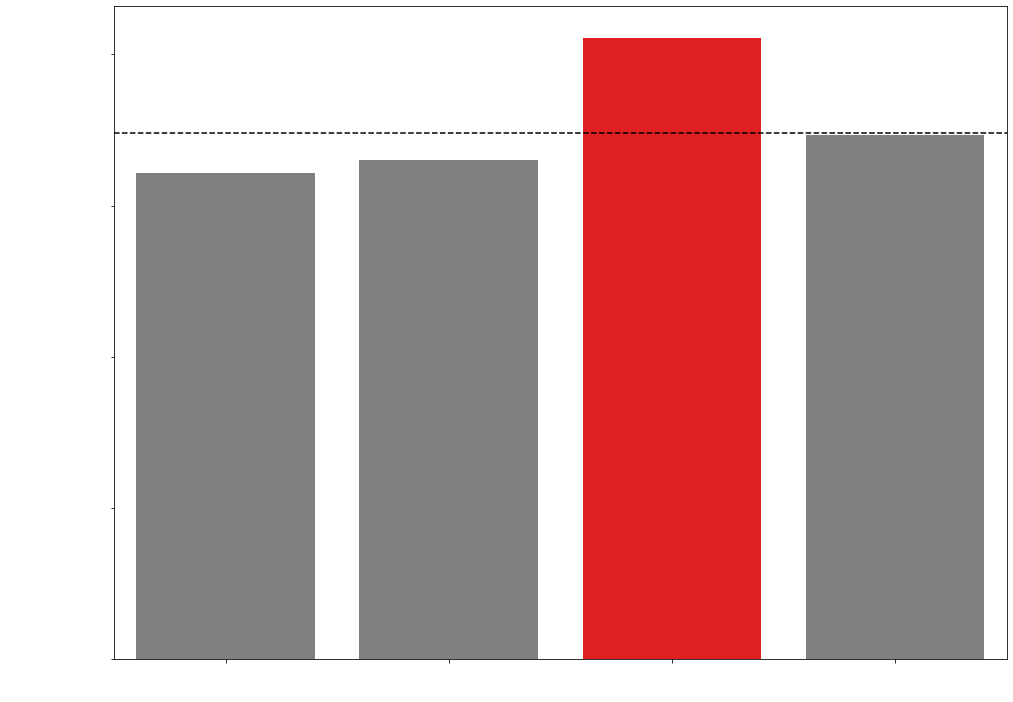

In [112]:
plt.rc("figure", figsize=(16, 12))
clrs = ['grey', 'grey', 'red', 'grey']

ax = sns.barplot(data=train,x='down', y='pass_stopped', ci=None, palette = clrs)
plt.xticks([0,1,2,3], ['1st Down', '2nd Down', '3rd Down', '4th Down'], size = 30, c='white')
plt.xlabel('', size = 30, c='white')
plt.ylabel('% Passes Stopped', size = 30, c='white')
plt.yticks(scipy.arange(0,.5,0.1), color = 'white', size = 30)
vals = ax.get_yticks()
ax.yaxis.set_major_formatter(PercentFormatter(1.0))
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
ax.axhline(.348, ls='--', c = 'black')
plt.title("",  size = 40, c='white')
plt.show()

# Formations and Pass Stopped

## Nickel

1945     1
11035    0
3867     0
10518    0
8749     1
        ..
7509     0
3671     0
5235     1
12280    1
10422    0
Name: nickel, Length: 7066, dtype: int64

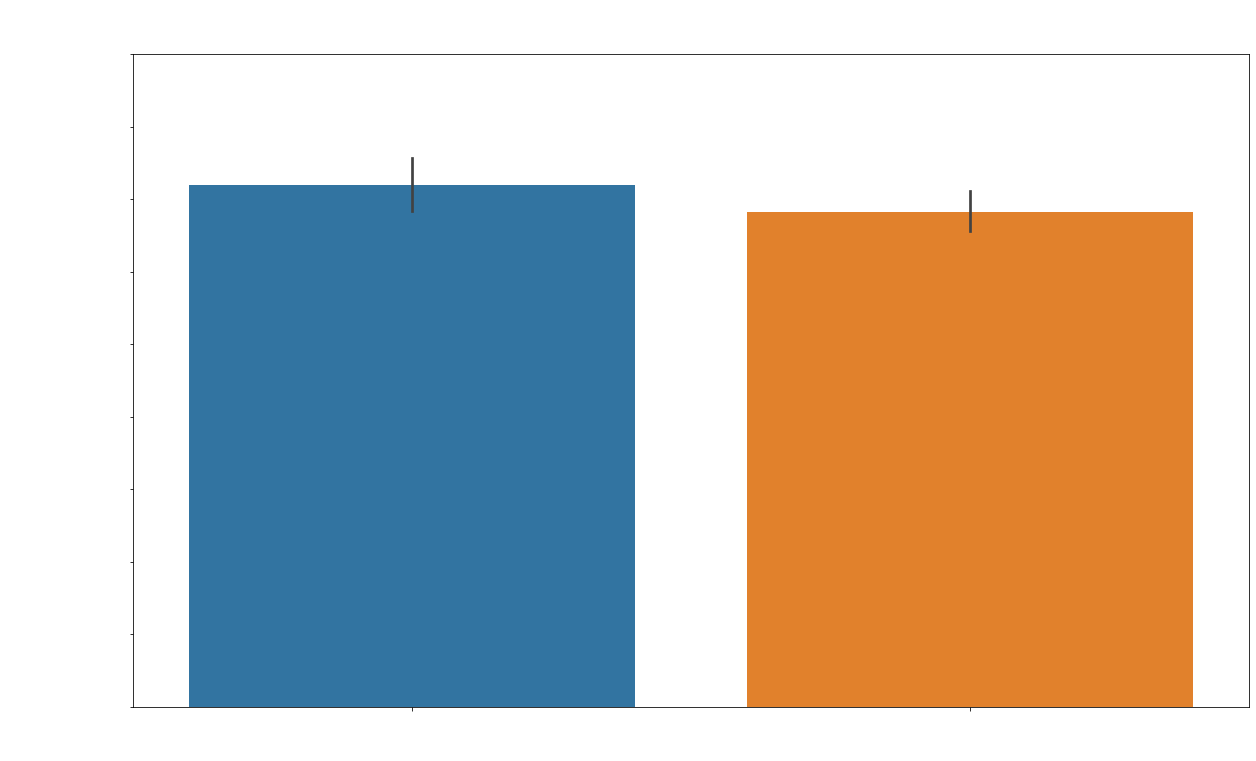

In [131]:
ax = sns.barplot(data=train,x='nickel', y='pass_stopped')
ax.set(ylim=(0, .45))
plt.xlabel('')
plt.ylabel('Pass Stopped %', size = 50, c = 'white')
plt.title("Nickel", size = 50, c = 'white')
plt.xticks([0,1], ['All Other Formations', 'Nickle Formation'], size = 40, c = 'white')
plt.yticks(size = 30, c='white')

vals = ax.get_yticks()
ax.yaxis.set_major_formatter(PercentFormatter(1.0))
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
plt.show()

## Dime

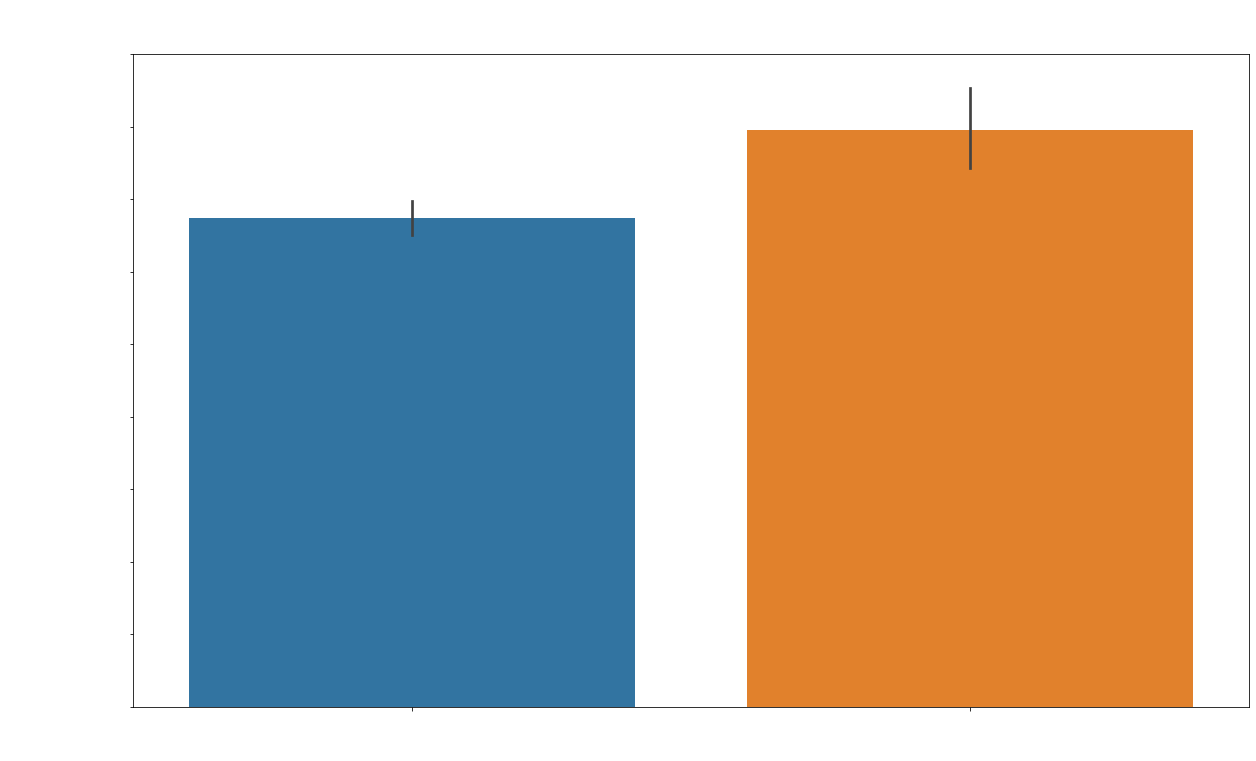

In [132]:
ax = sns.barplot(data=train,x='dime', y='pass_stopped')
ax.set(ylim=(0, .45))
plt.xlabel('')
plt.ylabel('Pass Stopped %', size = 50, c = 'white')
plt.title("Dime", size = 50, c = 'white')
plt.xticks([0,1], ['All Other Formations', 'Dime Formation'], size = 40, c = 'white')
plt.yticks(size = 30, c='white')

vals = ax.get_yticks()
ax.yaxis.set_major_formatter(PercentFormatter(1.0))
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
plt.show()

## 4-3

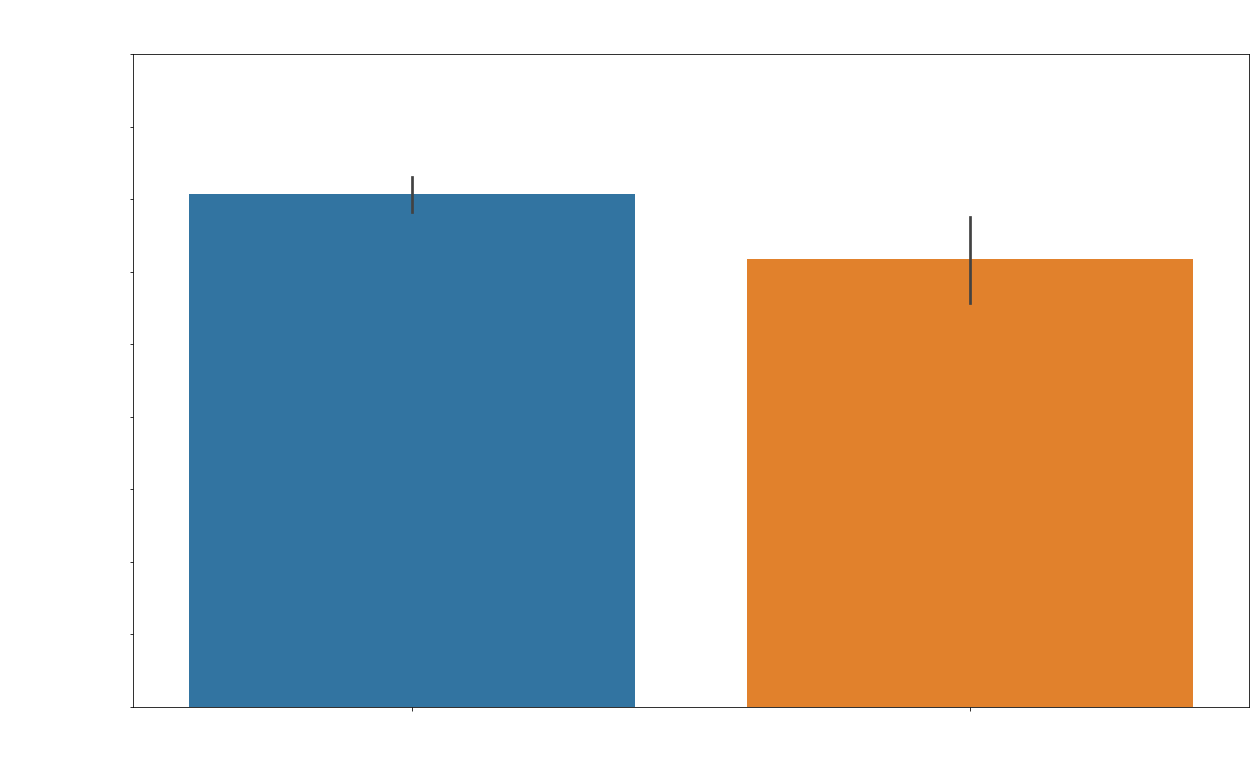

In [133]:
ax = sns.barplot(data=train,x='four_three', y='pass_stopped')
ax.set(ylim=(0, .45))
plt.xlabel('')
plt.ylabel('Pass Stopped %', size = 50, c = 'white')
plt.title("4-3", size = 50, c = 'white')
plt.xticks([0,1], ['All Other Formations', '4-3 Formation'], size = 40, c = 'white')
plt.yticks(size = 30, c='white')

vals = ax.get_yticks()
ax.yaxis.set_major_formatter(PercentFormatter(1.0))
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
plt.show()

In [155]:
train.dime.value_counts()

0    5800
1    1266
Name: dime, dtype: int64

In [156]:
train.four_three.value_counts()

0    6176
1     890
Name: four_three, dtype: int64

In [148]:
dime43 = train

In [149]:
def label_formations(row):
    if row['four_three'] == 1 :
        return 'four_three'
    if row['dime'] == 1:
        return 'dime'
    
    return 'Other'

In [150]:
dime43['off_formation'] = df.apply (lambda row: label_formations(row), axis=1)

In [153]:
dime43.off_formation.value_counts()

Other         4910
dime          1266
four_three     890
Name: off_formation, dtype: int64

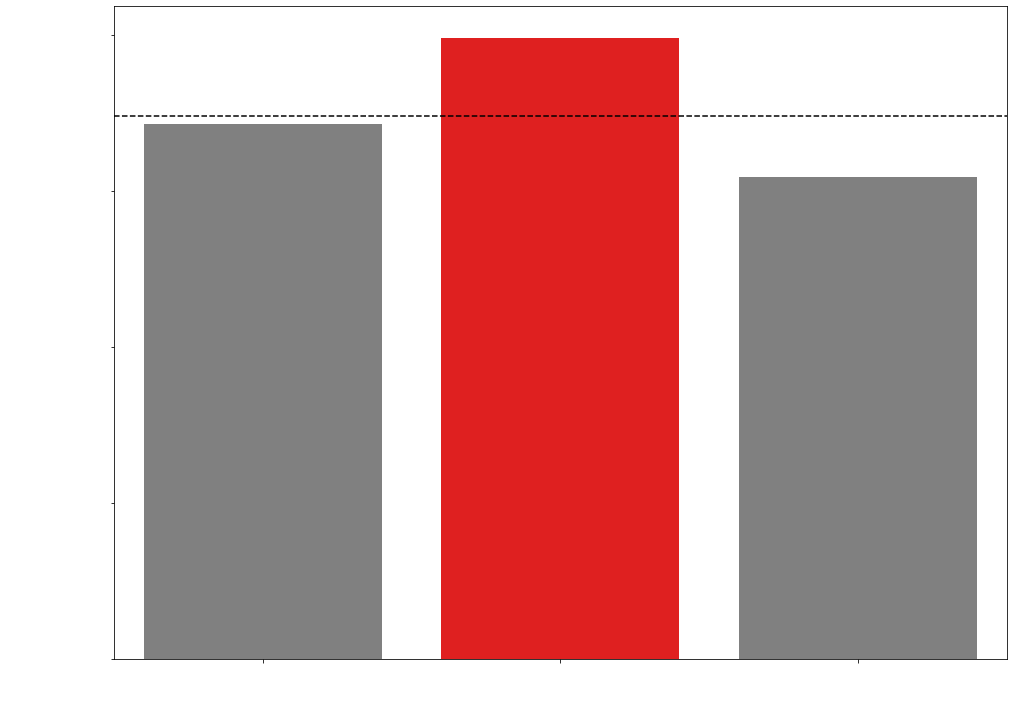

In [164]:
plt.rc("figure", figsize=(16, 12))
clrs = ['grey', 'red', 'grey']

ax = sns.barplot(data=dime43,x='off_formation', y='pass_stopped', ci=None, palette = clrs)
plt.xticks([0,1,2], ['Other Formation', 'Dime', '4-3'], size = 30, c='white' )
plt.xlabel('', size = 30, c='white' )
plt.ylabel('% Passes Stopped', size = 30, c='white' )
plt.yticks(scipy.arange(0,.5,0.1),  size = 30, c ='white')
vals = ax.get_yticks()
ax.yaxis.set_major_formatter(PercentFormatter(1.0))
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
ax.axhline(.348, ls='--', c = 'black')
plt.title("",  size = 40, )
plt.show()

## 3-4

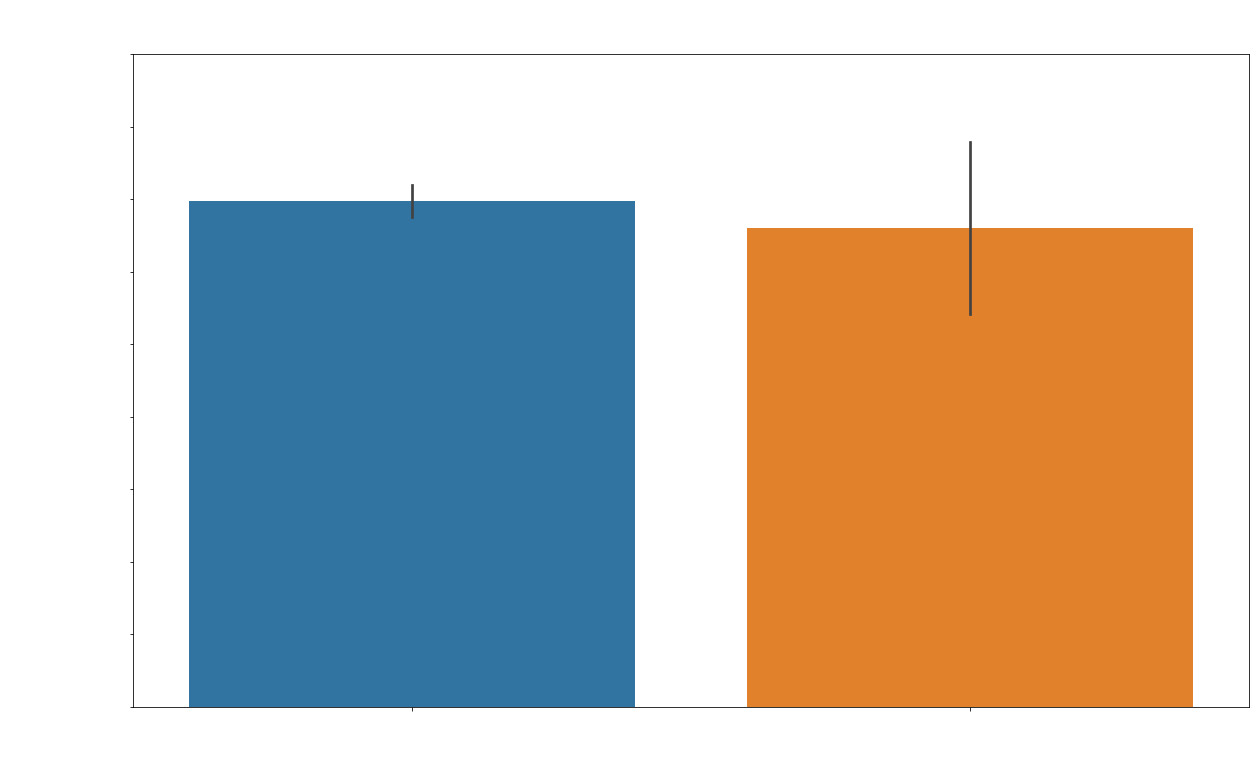

In [134]:
ax = sns.barplot(data=train,x='three_four', y='pass_stopped')
ax.set(ylim=(0, .45))
plt.xlabel('')
plt.ylabel('Pass Stopped %', size = 50, c = 'white')
plt.title("3-4", size = 50, c = 'white')
plt.xticks([0,1], ['All Other Formations', '3-4 Formation'], size = 40, c = 'white')
plt.yticks(size = 30, c='white')

vals = ax.get_yticks()
ax.yaxis.set_major_formatter(PercentFormatter(1.0))
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
plt.show()

# QB Pressure and Pass Stopped

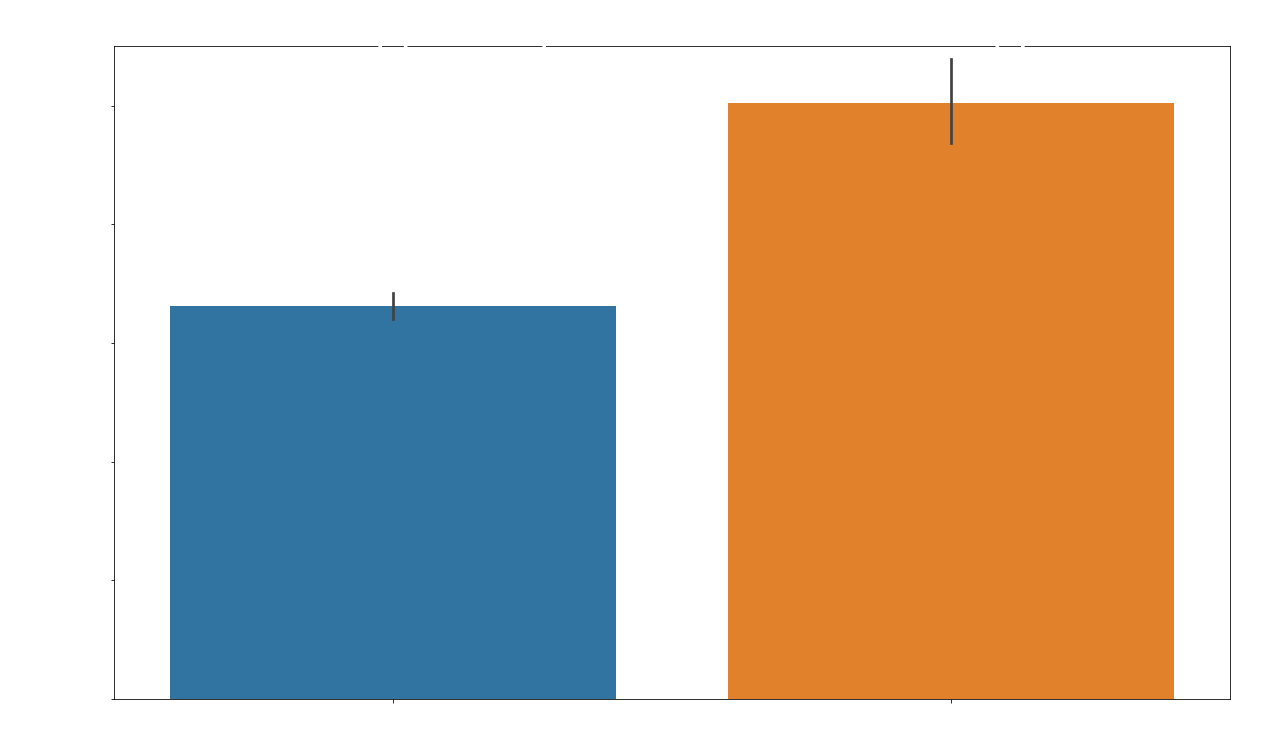

In [70]:
ax=sns.barplot(data=train,x='QB_under_pressure', y='pass_stopped')
plt.xlabel('', size = 30, c='white')
plt.xticks([0,1], ['No Pressure', 'Pressure Applied'] , size = 30, c='white')
plt.ylabel('Pass Stopped %' , size = 30, c='white')
plt.yticks(size = 30, c='white')
ax.set(ylim=(0, .55))
ax.yaxis.set_major_formatter(PercentFormatter(1.0))
plt.title("Are Passes Stopped dependent on Pressure Applied to QB?", size = 40, c='white')
plt.show()

# Defenders in the Box and Pass Stopped

In [53]:
defbox = train[train.defendersInTheBox !=1]
defbox = defbox[defbox.defendersInTheBox != 2]
defbox = defbox[defbox.defendersInTheBox != 3]
defbox = defbox[defbox.defendersInTheBox != 9]
defbox = defbox[defbox.defendersInTheBox != 10]
defbox = defbox[defbox.defendersInTheBox != 11]

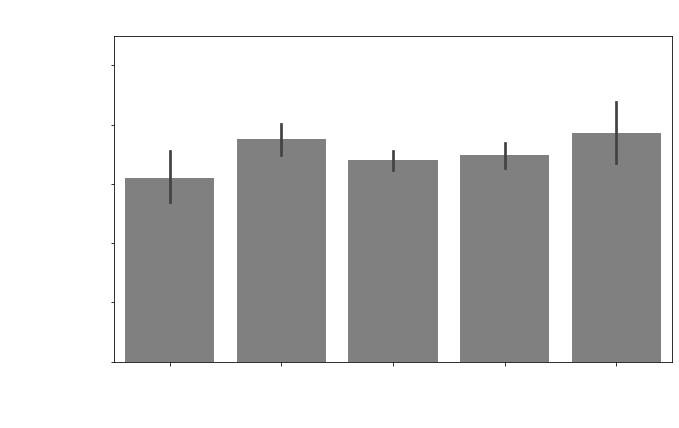

In [68]:
ax = sns.barplot(data=defbox,x='defendersInTheBox', y='pass_stopped', color='grey')
ax.set(ylim=(0, .55))
plt.xlabel('Defenders in the Box', size = 25, c='white')
plt.xticks([0,1,2,3,4], [4,5,6,7,8], size = 25, c='white')
plt.ylabel('Pass Stopped %', size=30, c='white')
plt.yticks(c='white', size = 30)
ax.yaxis.set_major_formatter(PercentFormatter(1.0))
plt.title("Defenders in the Box?", size = 30, c='white')
plt.show()

In [78]:
train.defendersInTheBox.value_counts()

6.0     3305
7.0     1609
5.0     1309
4.0      449
8.0      382
3.0       51
9.0       24
2.0        8
10.0       2
1.0        1
Name: defendersInTheBox, dtype: int64

# Defensive Position and Pass Stopped

## DL 

In [69]:
dl = train[train.DL !=0]
dl = dl[dl.DL != 1]
dl = dl[dl.DL != 5]
dl = dl[dl.DL != 6]

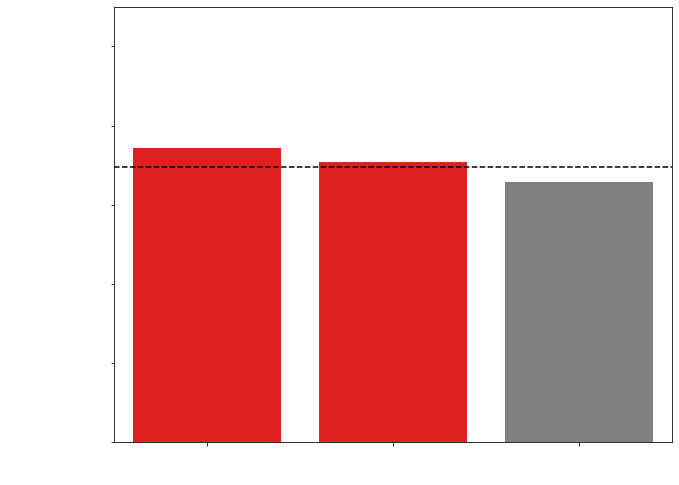

In [131]:
plt.rc("figure", figsize=(10, 8))
clrs = ['red', 'red', 'grey']

ax = sns.barplot(data=dl,x='DL', y='pass_stopped', palette = clrs, ci = None)
plt.xticks([0,1,2], ['2DL', '3DL', '4DL'], size = 30, c = 'white')
plt.xlabel('')
plt.ylabel('Pass Stopped %', size = 30, c = 'white')
plt.yticks(scipy.arange(0,.6,0.1), color = 'white', size = 30)
ax.set(ylim=(0, .55))
ax.yaxis.set_major_formatter(PercentFormatter(1.0))
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
ax.axhline(.348, ls='--', c = 'black')
plt.yticks(c='white', size = 30)
plt.show()

In [90]:
train.DL.value_counts()

4    3784
3    1901
2    1148
1     246
5      39
0      21
6       1
Name: DL, dtype: int64

## LB

In [106]:
lb = train[train.LB !=0]
lb = lb[lb.LB != 5]
lb = lb[lb.LB != 6]

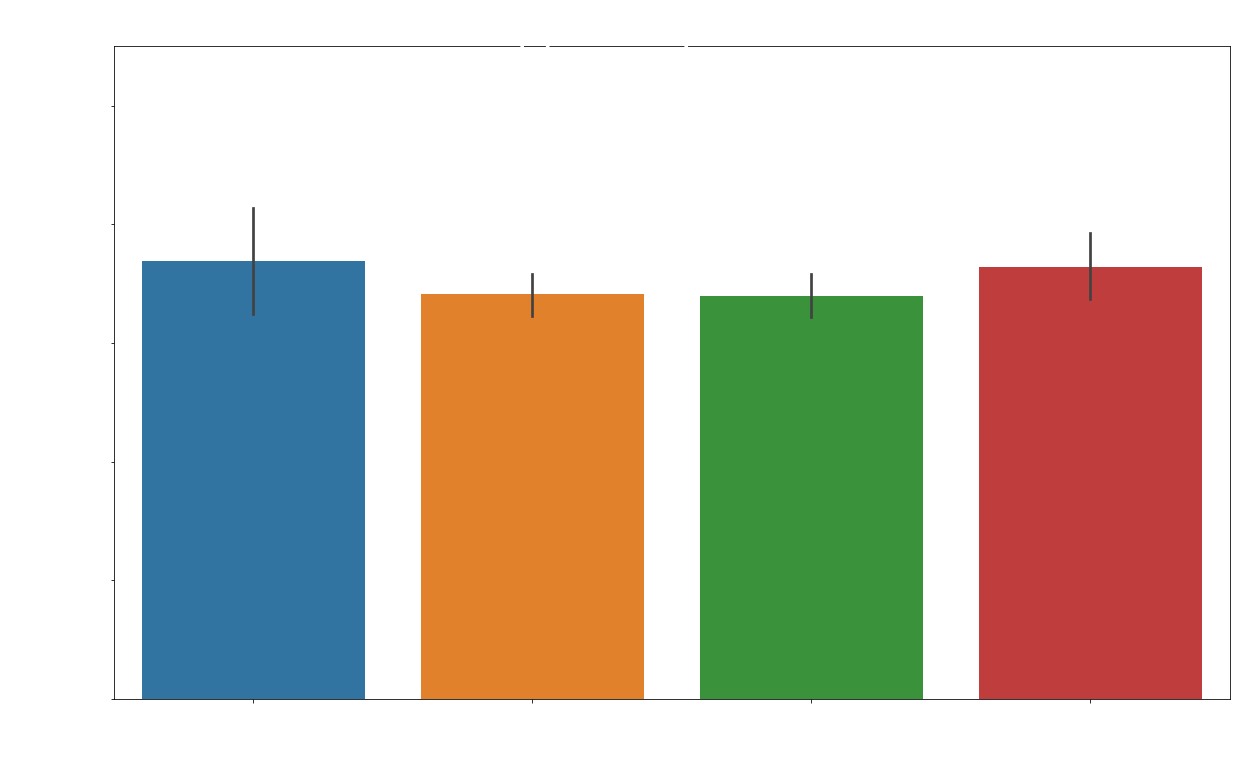

In [108]:
ax = sns.barplot(data=lb,x='LB', y='pass_stopped')
plt.xlabel('Number of LB', size = 30, c = 'white')
plt.xticks(size = 30, c = 'white')
plt.ylabel('Pass Stopped %', size = 30, c = 'white')
ax.set(ylim=(0, .55))
ax.yaxis.set_major_formatter(PercentFormatter(1.0))
plt.yticks(c='white', size = 30)
plt.title("Are Passes Stopped dependent on LB count?", size = 40, c = 'white')
plt.show()

In [94]:
train.LB.value_counts()

2    2923
3    2469
4    1163
1     470
5     103
0      11
6       1
Name: LB, dtype: int64

## DB

In [159]:
db = train[train.DB !=2]
db = db[db.DB != 3]
db = db[db.DB != 7]
db = db[db.DB != 8]
db = db[db.DB != 1]

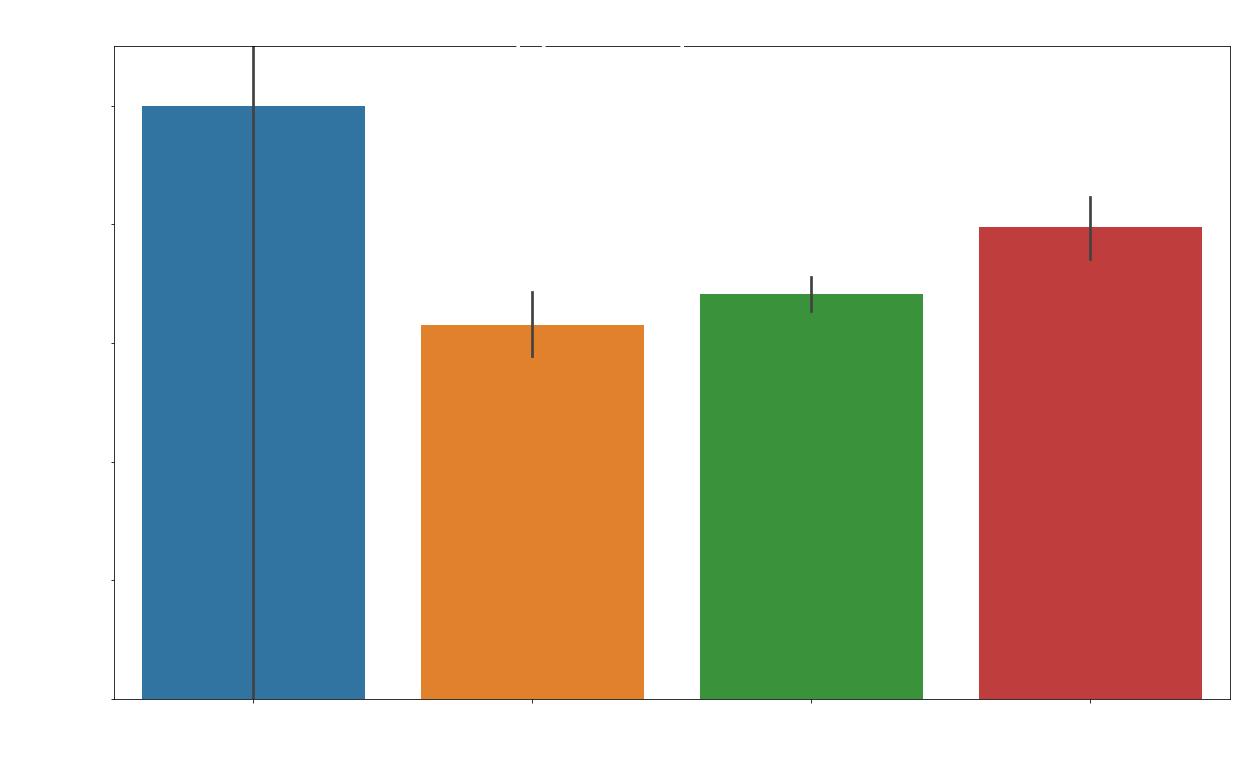

In [110]:
ax = sns.barplot(data=db,x='DB', y='pass_stopped')
plt.xlabel('Number of DB', size = 30, c = 'white')
plt.xticks(size = 30, c = 'white')
plt.ylabel('Pass Stopped %', size = 30, c = 'white')
ax.set(ylim=(0, .55))
ax.yaxis.set_major_formatter(PercentFormatter(1.0))
plt.yticks(c='white', size = 30)
plt.title("Are Passes Stopped dependent on DB count?", size = 40, c = 'white')
plt.show()

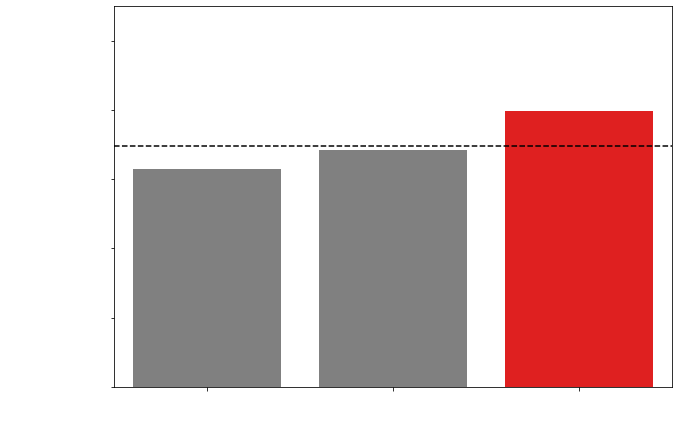

In [161]:
plt.rc("figure", figsize=(10, 7))
clrs = ['grey', 'grey', 'red']

ax = sns.barplot(data=db,x='DB', y='pass_stopped', palette = clrs, ci = None)
plt.xticks([0,1,2], ['4DB', '5DB', '6DB'], size = 30, c = 'white')
plt.xlabel('')
plt.ylabel('Pass Stopped %', size = 30, c = 'white')
plt.yticks(scipy.arange(0,.6,0.1), color = 'white', size = 30)
ax.set(ylim=(0, .55))
ax.yaxis.set_major_formatter(PercentFormatter(1.0))
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
ax.axhline(.348, ls='--', c = 'black')
plt.yticks(c='white', size = 30)
plt.show()

In [96]:
train.DB.value_counts()

5    4560
6    1286
4    1160
7     124
3       8
2       1
8       1
Name: DB, dtype: int64

# Closest Defender and Position

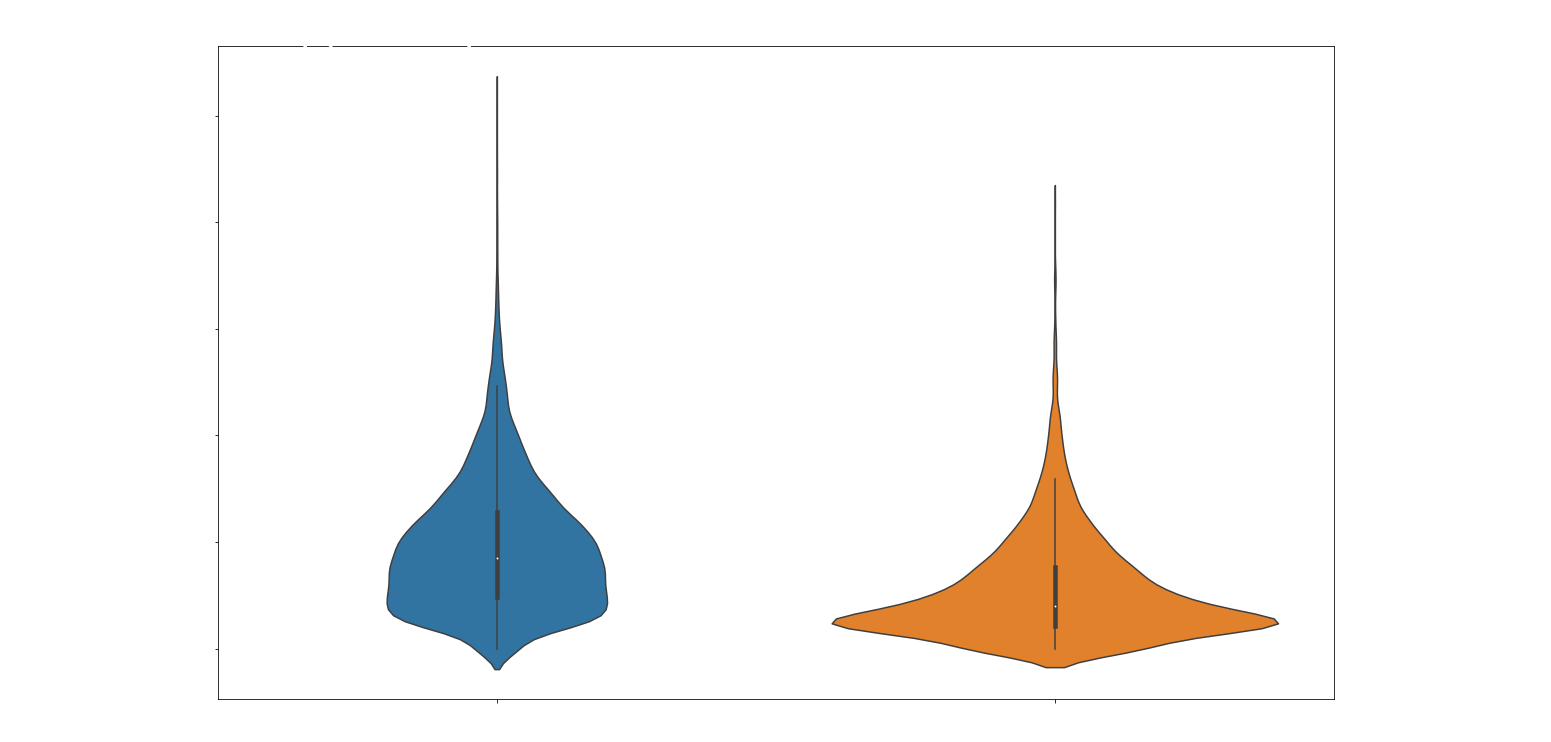

In [37]:
ex = df[df.closest_dist < 50]
plt.rc("figure", figsize=(20, 12))
sns.violinplot(ex.pass_stopped, ex.closest_dist)
plt.xlabel('')
plt.xticks([0,1], ['Pass Completed', 'Pass Stopped'], size = 30, c='white')
plt.yticks(c='white', size = 24)
plt.ylabel('Distance from Defender to Targeted Receiver (yards)', size = 24, c='white')
plt.title("Are Passes Stopped dependent on distance of Closest Defender to Receiver?", size = 40, c='white')
plt.show()

<AxesSubplot:xlabel='DL', ylabel='DB'>

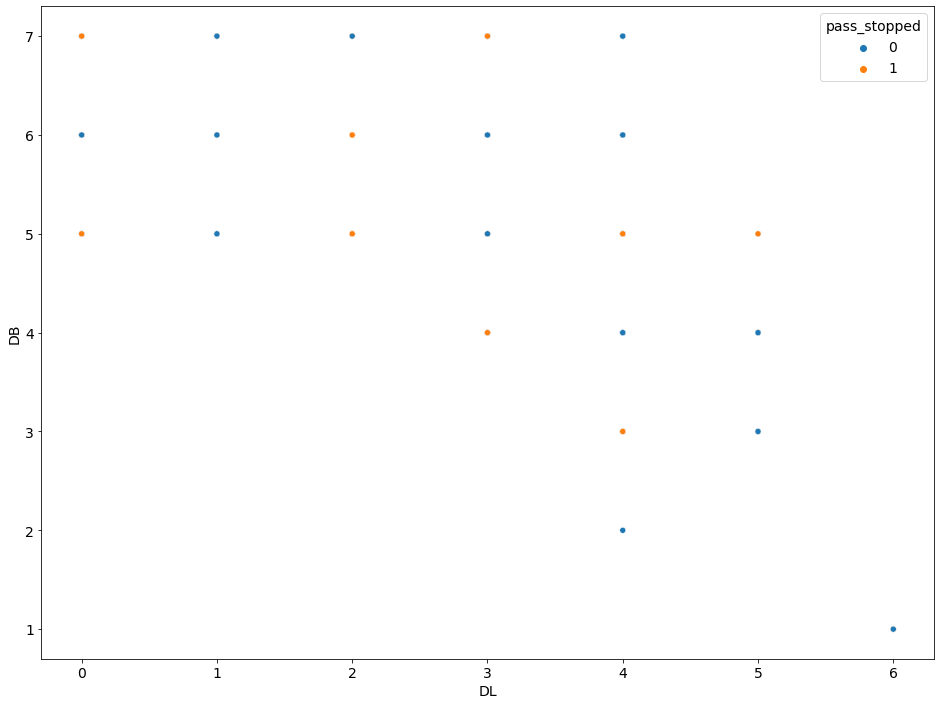

In [115]:
sns.scatterplot(data=train, x = 'DL', y = 'DB', hue = 'pass_stopped')

# End